In [2]:
# %%
import gdown
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output
import time
from datetime import datetime
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string as string

Asegurarnos de estar en carpeta : Proyecto-Grupal---Olist sino la posees creala

In [22]:

#os.chdir("C:/Users/Ricardo/Desktop/Proyecto-Grupal---Olist/")

Revisando el directorio correcto y creando el directorio para el input al ETL. Se maneja el error en caso el directorio exista para no suspender el programa.

In [8]:

os.getcwd()
try:
    os.mkdir("ETL")
except FileExistsError as error:
    print("Directorio para ETL ya estaba creado.")

Directorio para ETL ya estaba creado.


Accesando el link de drive 

In [3]:

url = "https://drive.google.com/drive/folders/14DFvVrsV6zIBH0ARnArBZdUhSXcf6OYh?usp=share_link"

print("conectando con Google drive y leyendo archivos ...")

files = gdown.download_folder(url, quiet=True, use_cookies=False)
files

conectando con Google drive y leyendo archivos ...


['c:\\Users\\Ricardo\\Desktop\\Proyecto-Grupal---Olist\\Datasets\\olist_closed_deals_dataset.csv',
 'c:\\Users\\Ricardo\\Desktop\\Proyecto-Grupal---Olist\\Datasets\\olist_customers_dataset.csv',
 'c:\\Users\\Ricardo\\Desktop\\Proyecto-Grupal---Olist\\Datasets\\olist_geolocation_dataset.csv',
 'c:\\Users\\Ricardo\\Desktop\\Proyecto-Grupal---Olist\\Datasets\\olist_marketing_qualified_leads_dataset.csv',
 'c:\\Users\\Ricardo\\Desktop\\Proyecto-Grupal---Olist\\Datasets\\olist_order_items_dataset.csv',
 'c:\\Users\\Ricardo\\Desktop\\Proyecto-Grupal---Olist\\Datasets\\olist_order_payments_dataset.csv',
 'c:\\Users\\Ricardo\\Desktop\\Proyecto-Grupal---Olist\\Datasets\\olist_order_reviews_dataset.csv',
 'c:\\Users\\Ricardo\\Desktop\\Proyecto-Grupal---Olist\\Datasets\\olist_orders_dataset.csv',
 'c:\\Users\\Ricardo\\Desktop\\Proyecto-Grupal---Olist\\Datasets\\olist_products_dataset.csv',
 'c:\\Users\\Ricardo\\Desktop\\Proyecto-Grupal---Olist\\Datasets\\olist_sellers_dataset.csv',
 'c:\\Users\\R

Extraemos exclusivamente el nombre diferencial del archivo

In [4]:

nombres=[]
for file in files:
    lista = file.split("Datasets\\") 
    nombre = lista[1].replace("olist_","").replace(".csv","").replace("_dataset","").capitalize()
    nombres.append(nombre)
    
    

Entramos al bucle iterador de revisión de la data. Dentro de la transformación de fechas, el programa revisa si existe algún título de columna que contenga las palabras **date** o **stamp**, en caso de encontrarlas, se efectúa la transformación correspondiente a formato **datetime**.



********************************
Carga de Closed_deals
********************************


Tamaño del dataset
------------------


El dataset Closed_deals contiene 842 filas y 14 columnas


Muestreo de 10 registros aleatorios
-----------------------------------


                               mql_id                         seller_id  \
458  c7f1da0a5723f5afd7996648fa9c20d5  42fa4ee7240e9b8eb4576358ec142ba7   
576  bc419ad99b06b6b3e155039d714e2061  54583ab379489add547fe47b628db589   
417  ff89e8ee1db049c810a2da86c84c6bd5  07de60b03d150fb3ea09eab5da5e4c8b   
665  2dfbe1c802c78a8b1f75ef13b70c1124  382229d1e840115ffe3dbf5ff460e417   
618  8ba72c13888964788024b12e39aef6de  6b90f847357d8981edd79a1eb1bf0acb   
208  8f118ab2a5c0d99362fb67e29856acab  94d76e96eedd976258cd3278ce56d5f2   
709  c0fa242837c43fe0531989b269153441  45a9bd664803609f452cce925e21d24d   
706  b13432d01614c9d18263698af2837e1e  429e2324ee8c0a95b565f78b465e8a07   
724  062eb81d4674705d10c8ecb848358cb3  1c16af6213cf83914774c

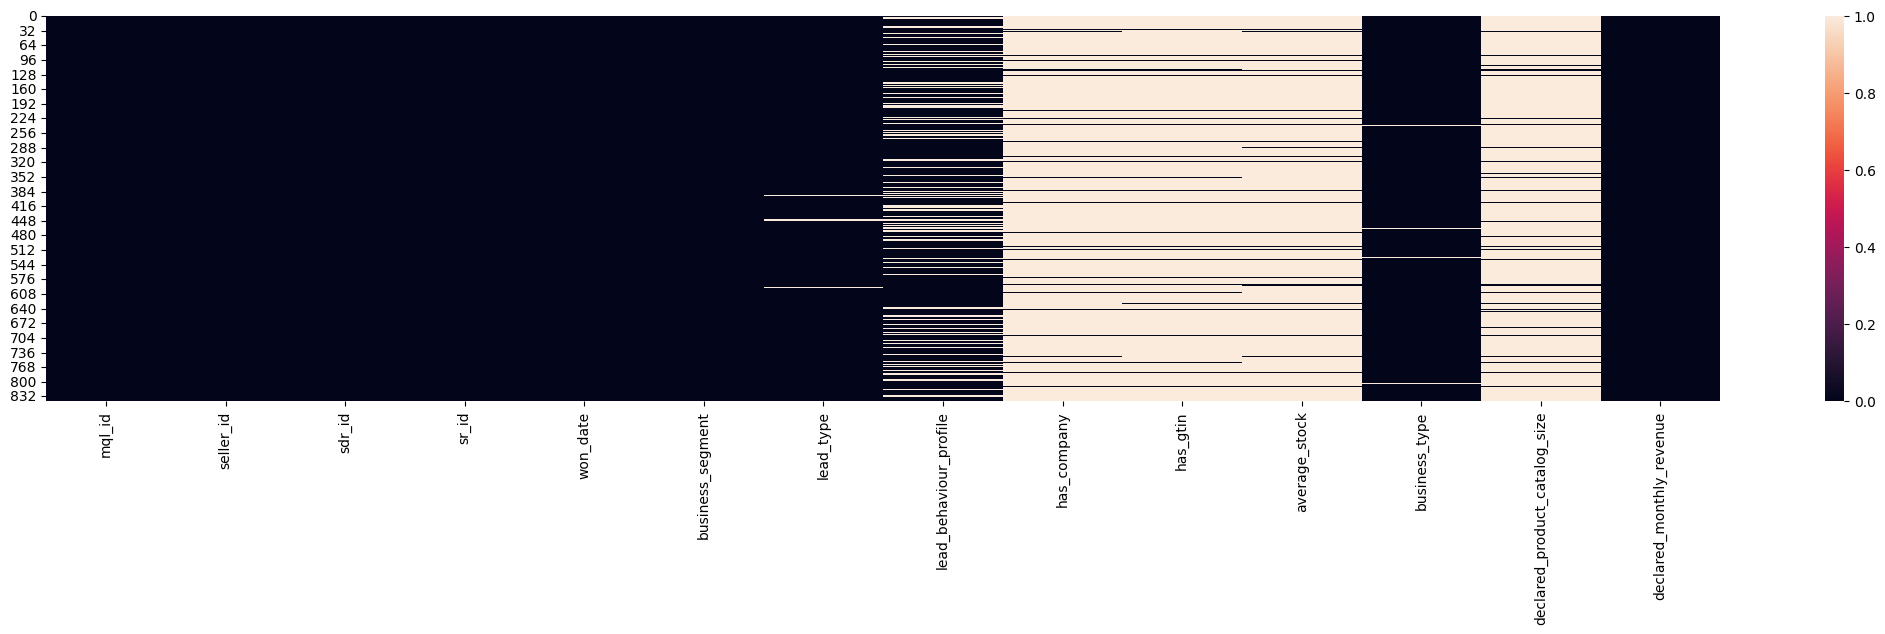

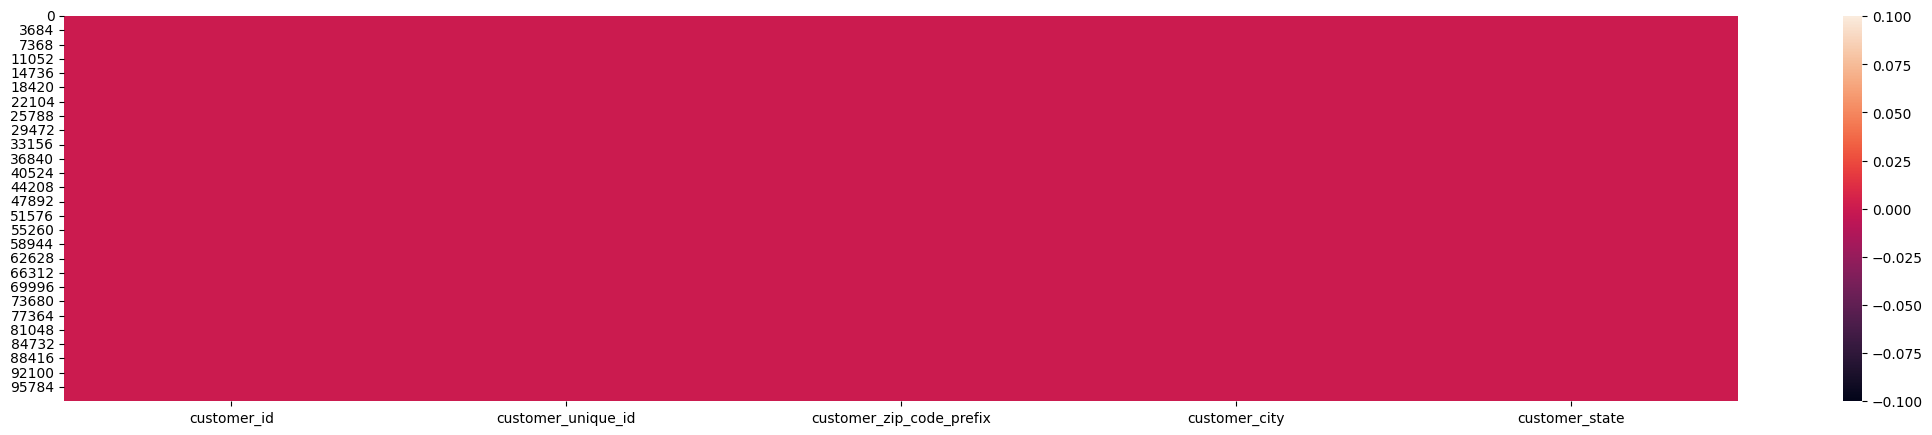

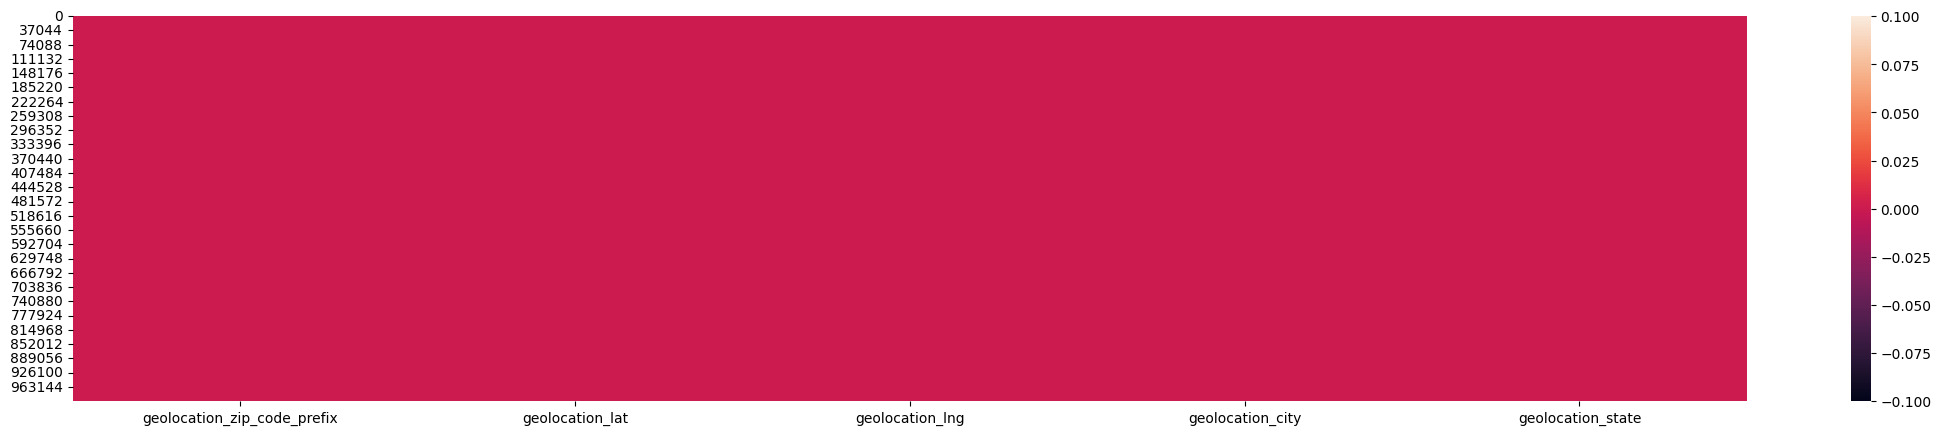

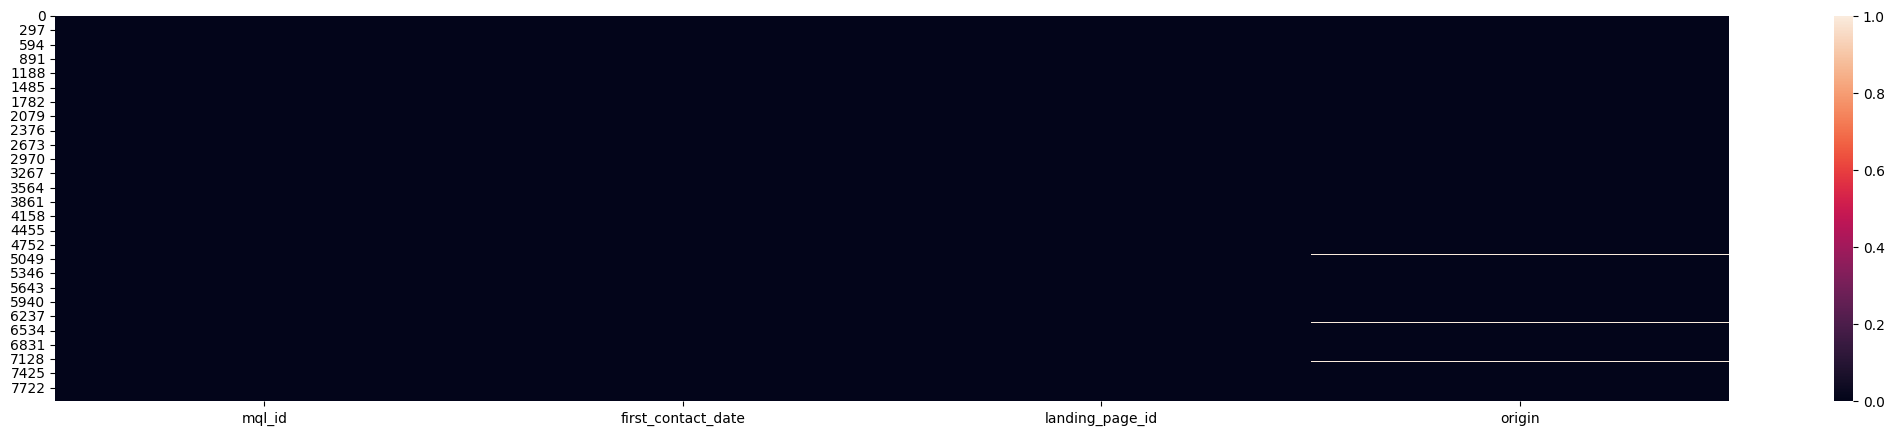

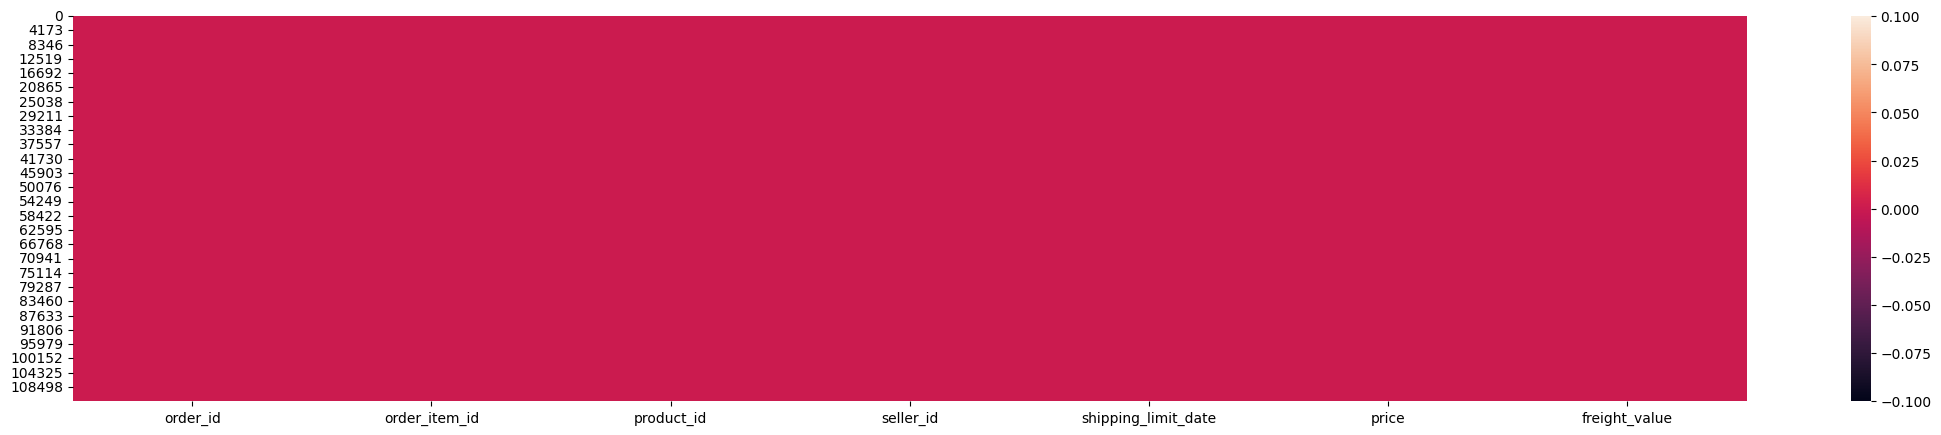

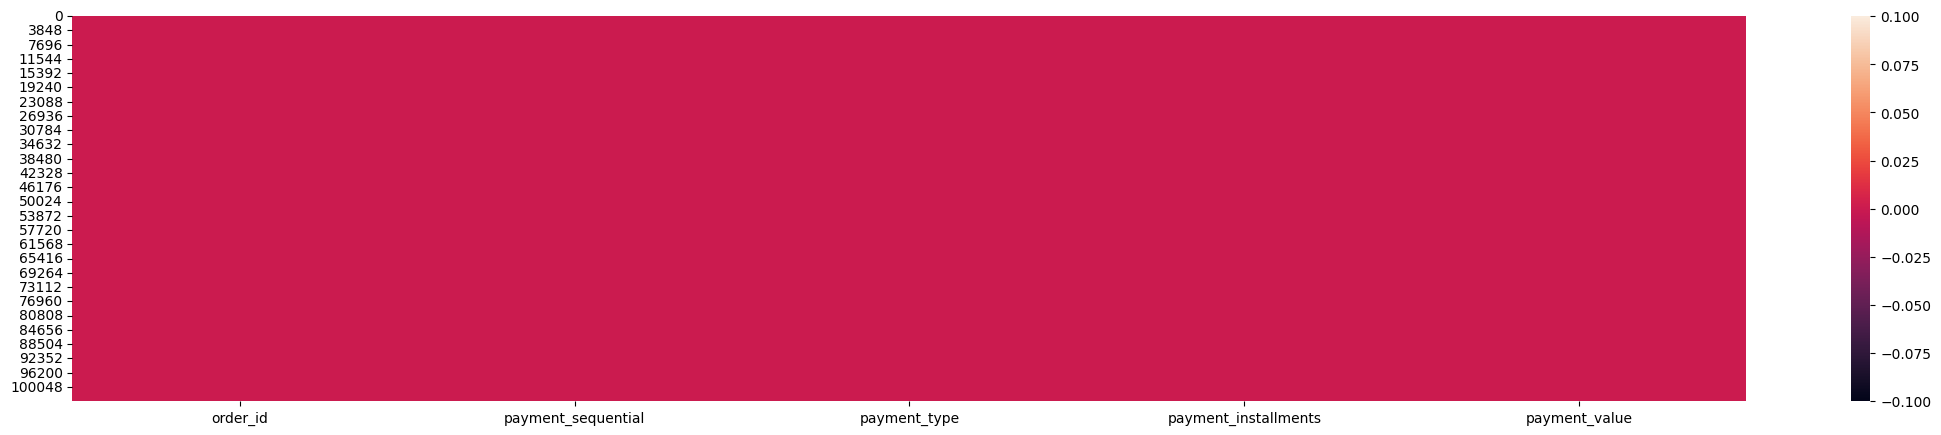

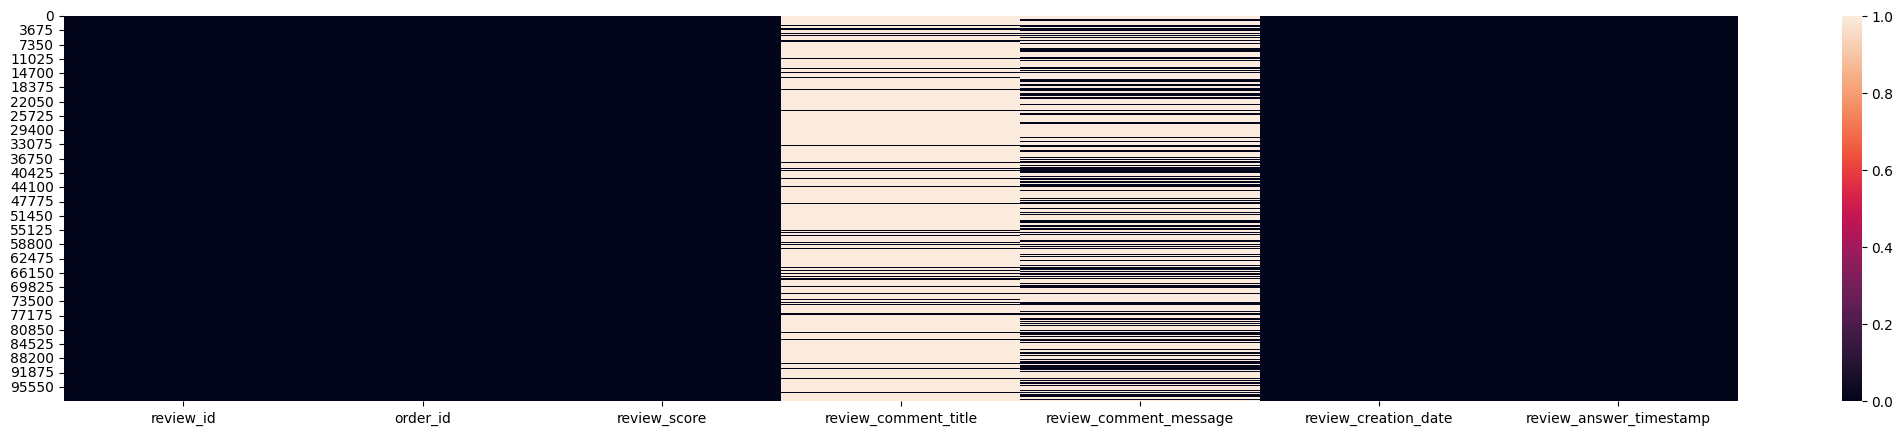

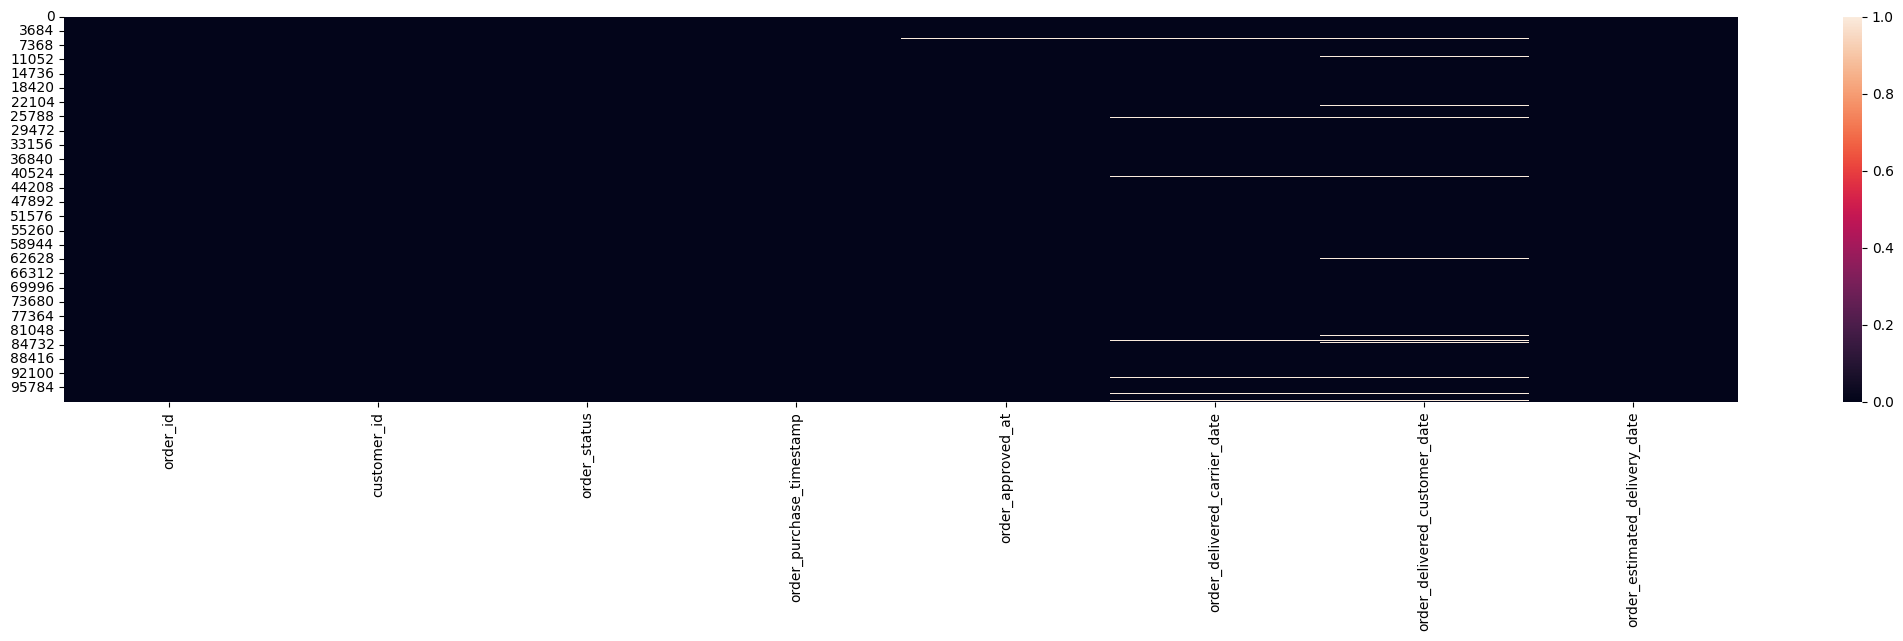

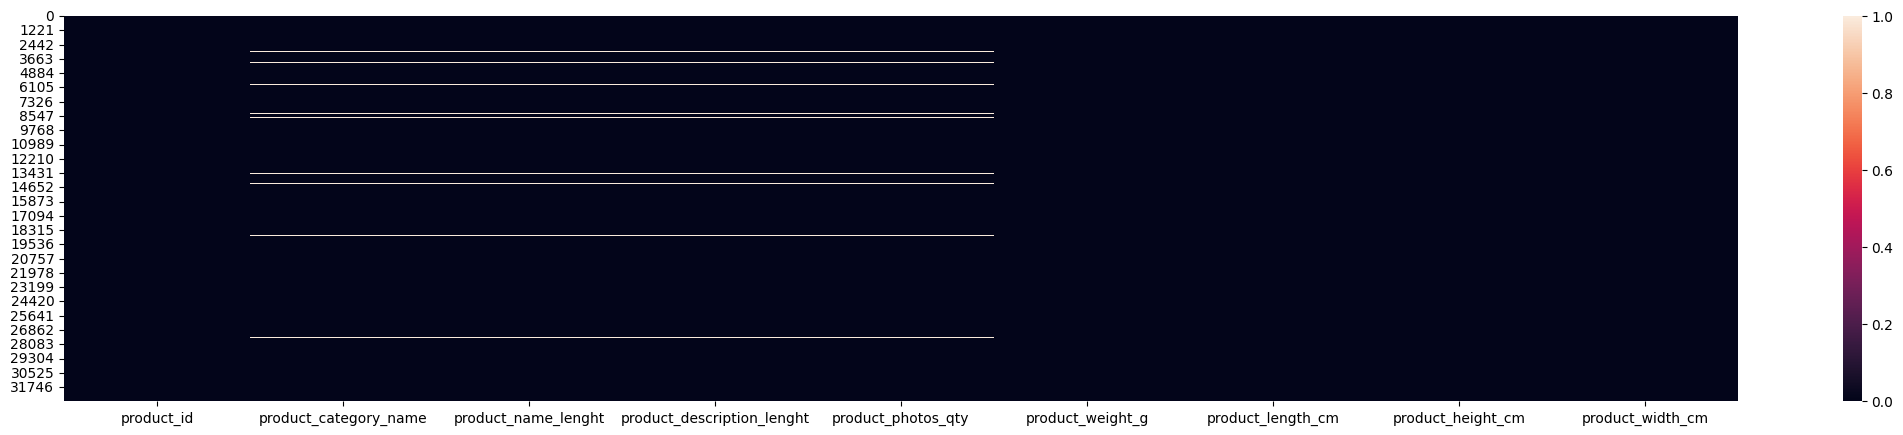

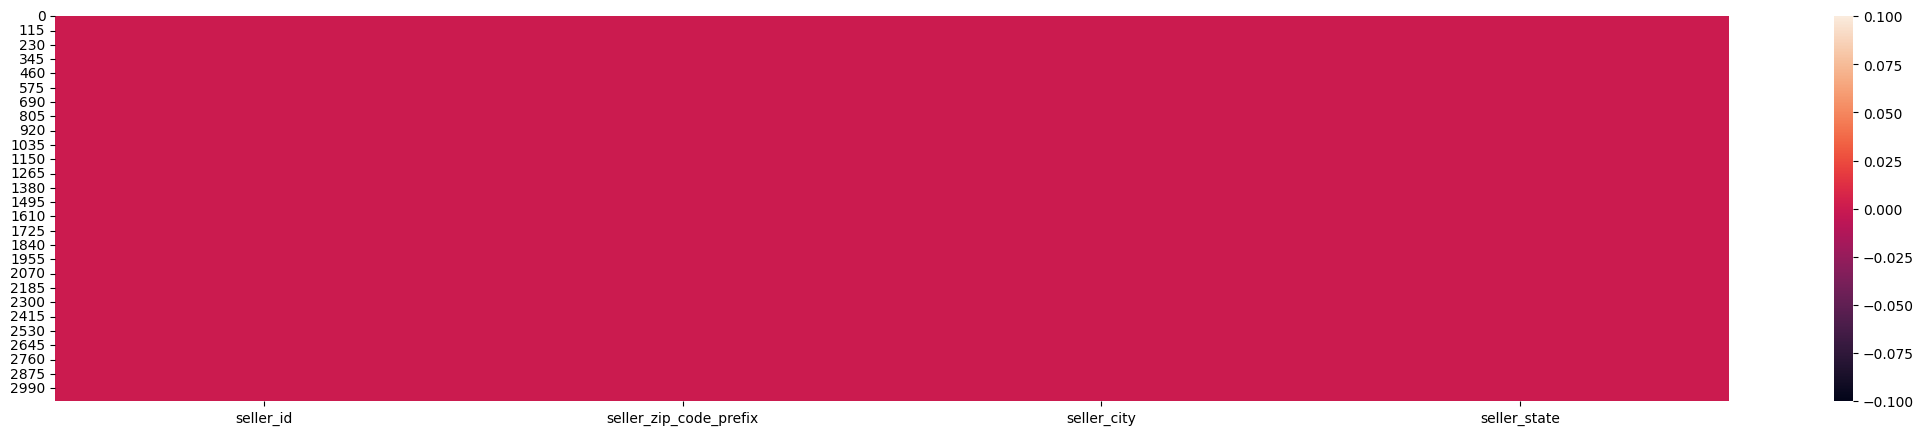

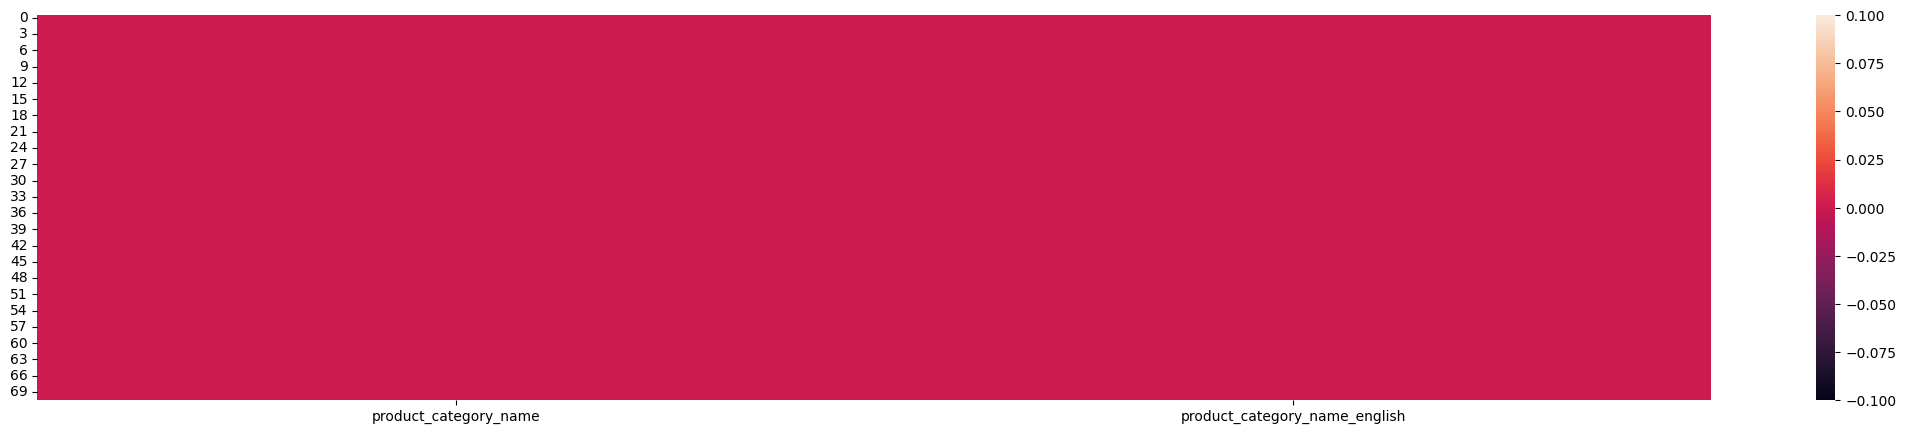

In [9]:


for pos,file in enumerate(files) :
    
    data = pd.read_csv(file)
    print("\n")
    print("********************************")
    print(f"Carga de {nombres[pos]}")
    print("********************************")
    print("\n")

    print("Tamaño del dataset")
    print("------------------")
    print("\n")
    print(f"El dataset {nombres[pos]} contiene {data.shape[0]} filas y {data.shape[1]} columnas")
    print("\n")

    print("Muestreo de 10 registros aleatorios")
    print("-----------------------------------")
    print("\n")
    print(data.sample(10))
    print("\n")

    print("Columnas, tipo de datos y cantidad de no nulos")
    print("----------------------------------------------")
    print("\n")
    print(data.info())
    print("\n")
    
    print("Valores perdidos en el dataset :")
    print("--------------------------------")
    print("\n")
    print(data.isna().sum(axis=0))
    print("\n")
    plt.figure(figsize=(27,5))
    mapa = sns.heatmap(data.isna())
    figure =mapa.get_figure()
    

    print("Revisión de algun campo fecha")
    print("------------------------------")
    print("\n")
    columnas = data.columns
    fecs = [col for col in columnas if "date" in col or "stamp" in col]
    for campo in fecs:
        data[campo]=pd.to_datetime(data[campo],errors="raise")

    if fecs :
        data.info()
    else:
        print(f"El archivo {nombres[pos]} no posee campos de tipo Date.")

    data.to_csv("ETL/"+nombres[pos]+".csv")




